<a href="https://colab.research.google.com/github/statsupriya/project/blob/main/supriya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.impute import SimpleImputer

In [ ]:
# Step 2: Load the dataset
df = pd.read_csv('/content/equipment_anomaly_data.csv')  # Replace with your actual file path
print("Dataset Loaded Successfully!")
print(df.head())
print(df.info())

Dataset Loaded Successfully!
   temperature   pressure  vibration   humidity   equipment       location  \
0    58.180180  25.029278   0.606516  45.694907     Turbine        Atlanta   
1    75.740712  22.954018   2.338095  41.867407  Compressor        Chicago   
2    71.358594  27.276830   1.389198  58.954409     Turbine  San Francisco   
3    71.616985  32.242921   1.770690  40.565138        Pump        Atlanta   
4    66.506832  45.197471   0.345398  43.253795        Pump       New York   

   faulty  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-nul

In [ ]:
# Step 3: Preprocess the data
# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Impute missing numerical values with mean
numerical_cols = ['temperature', 'pressure', 'vibration', 'humidity']
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Handle categorical columns (equipment and location)
label_encoder_equipment = LabelEncoder()
label_encoder_location = LabelEncoder()
df['equipment'] = label_encoder_equipment.fit_transform(df['equipment'])
df['location'] = label_encoder_location.fit_transform(df['location'])

# Check for any remaining missing values
print("Missing Values After Imputation:\n", df.isnull().sum())

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Define features (X) and target (y)
X = df.drop('faulty', axis=1)
y = df['faulty']

Missing Values After Imputation:
 temperature    0
pressure       0
vibration      0
humidity       0
equipment      0
location       0
faulty         0
dtype: int64


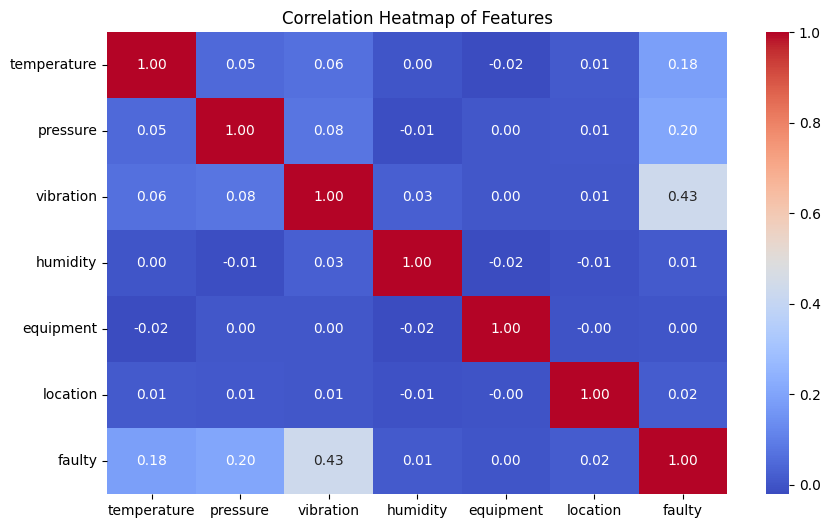

In [ ]:
# Step 4: Exploratory Data Analysis (EDA) with 6 High-Performance Graphs

# Graph 1: Correlation Heatmap (Understand feature relationships)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
# Check for any remaining missing values
print("Missing Values After Imputation:\n", df.isnull().sum())

Missing Values After Imputation:
 temperature    0
pressure       0
vibration      0
humidity       0
equipment      0
location       0
faulty         0
dtype: int64


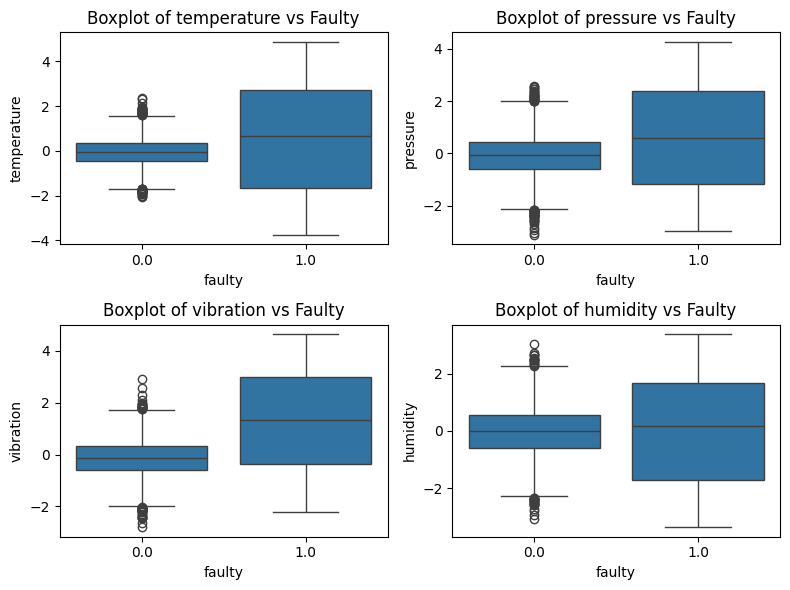

In [ ]:
# Graph 2: Boxplot of Numerical Features vs Faulty (Detect outliers and differences)
plt.figure(figsize=(8, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='faulty', y=col, data=df)
    plt.title(f'Boxplot of {col} vs Faulty')
plt.tight_layout()
plt.show()

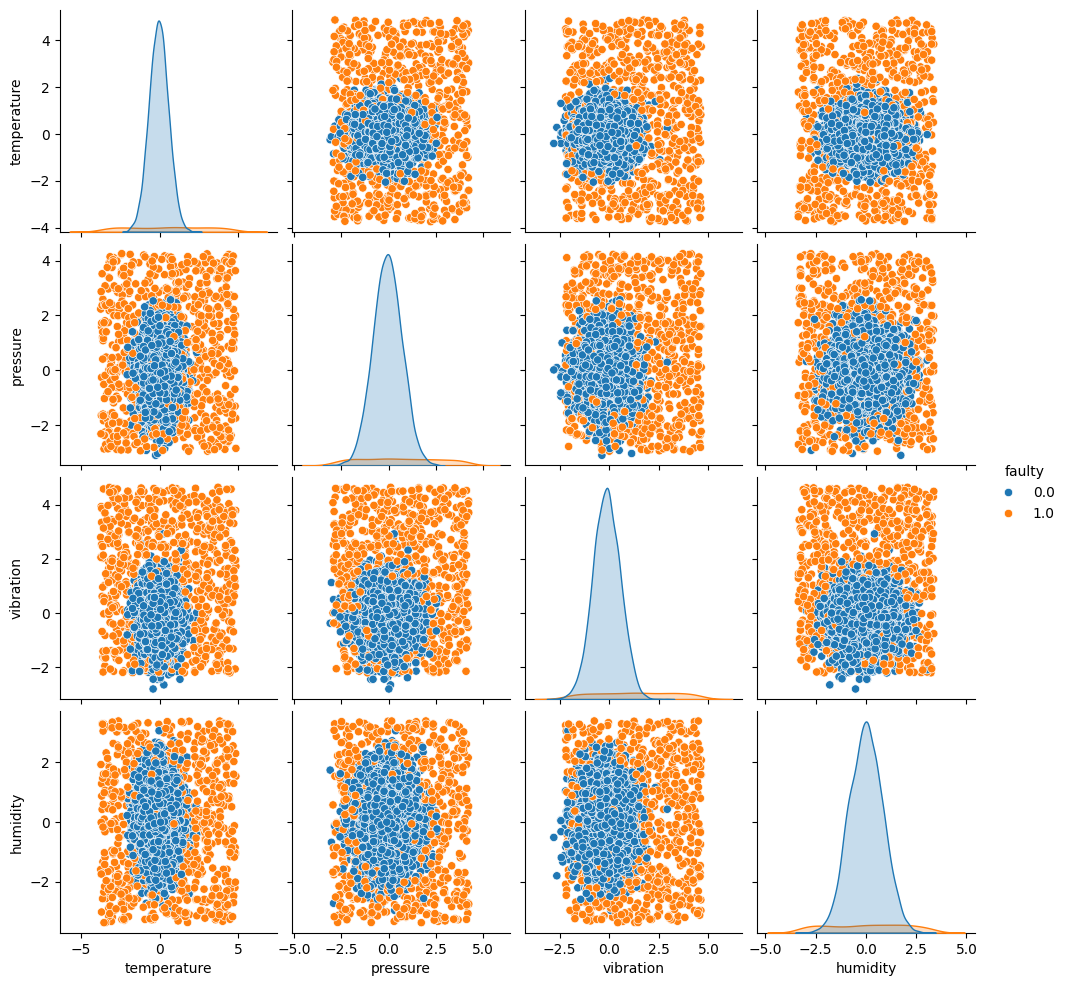

In [ ]:
# Graph 3: Pairplot (Visualize feature interactions and faulty distribution)
sns.pairplot(df, hue='faulty', vars=numerical_cols)
plt.show()

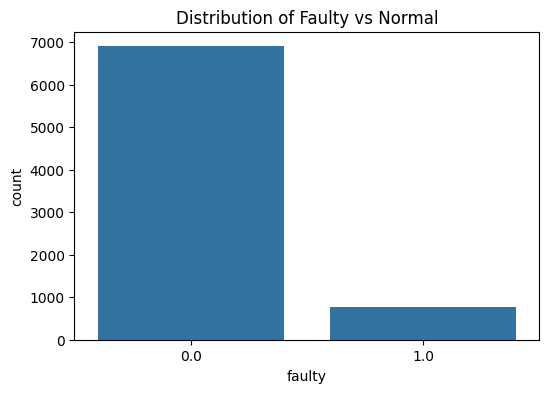

In [ ]:
# Graph 4: Countplot of Faulty (Check class imbalance)
plt.figure(figsize=(6, 4))
sns.countplot(x='faulty', data=df)
plt.title('Distribution of Faulty vs Normal')
plt.show()

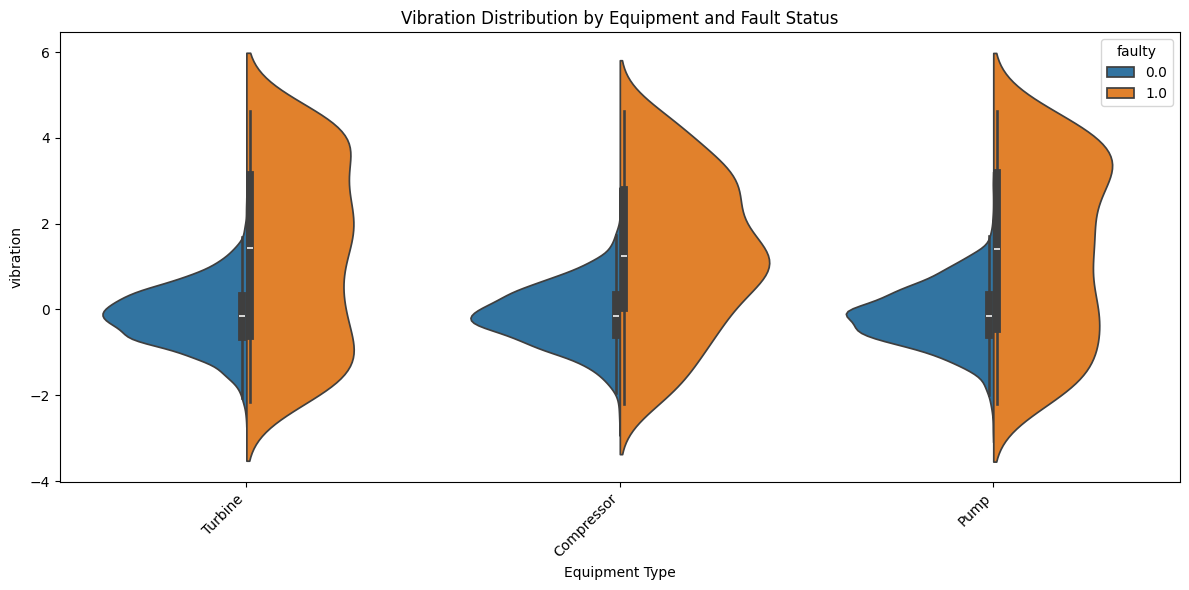

In [ ]:
# Graph 5: Violin Plot of Vibration by Equipment (Feature vs categorical)
plt.figure(figsize=(12, 6))  # Slightly wider to accommodate labels
sns.violinplot(x='equipment', y='vibration', hue='faulty', split=True, data=df)
plt.title('Vibration Distribution by Equipment and Fault Status')

# Replace x-tick labels with original equipment names
equipment_labels = label_encoder_equipment.inverse_transform(df['equipment'].unique())
plt.xticks(ticks=range(len(equipment_labels)), labels=equipment_labels, rotation=45, ha='right')  # Rotate for readability
plt.xlabel('Equipment Type')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

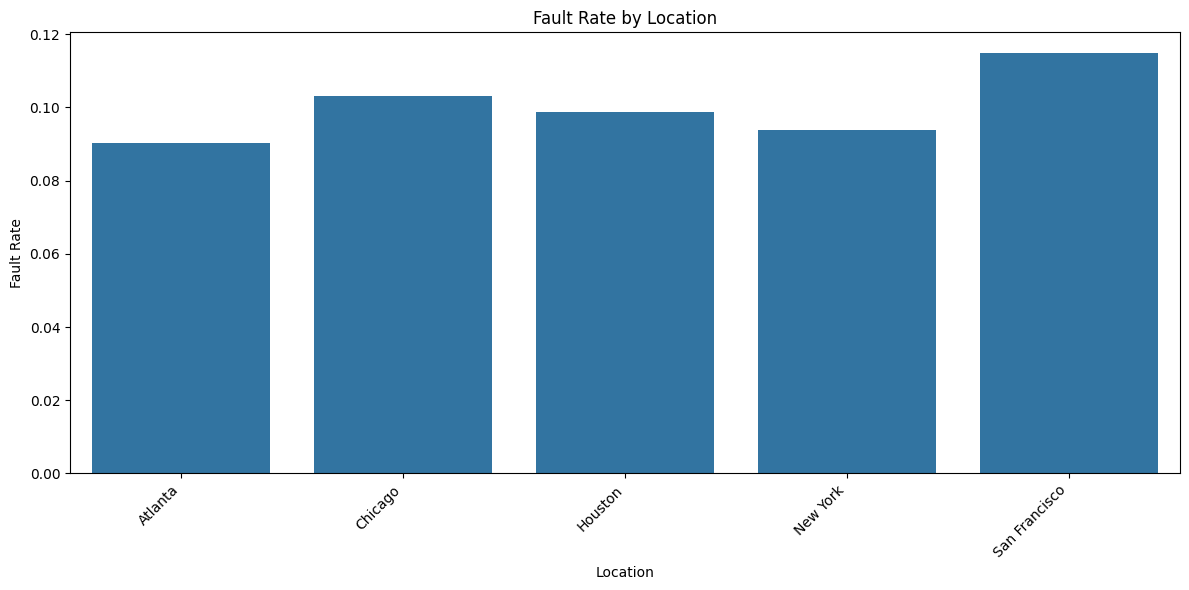

In [ ]:
# Graph 6: Barplot of Fault Rate by Location (Categorical analysis)
fault_rate_by_location = df.groupby('location')['faulty'].mean()
plt.figure(figsize=(12, 6))  # Slightly wider to accommodate labels
sns.barplot(x=fault_rate_by_location.index, y=fault_rate_by_location.values)
plt.title('Fault Rate by Location')

# Replace x-tick labels with original location names
location_labels = label_encoder_location.inverse_transform(fault_rate_by_location.index)
plt.xticks(ticks=range(len(location_labels)), labels=location_labels, rotation=45, ha='right')  # Rotate for readability
plt.xlabel('Location')
plt.ylabel('Fault Rate')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [ ]:
pip install xgboost

In [ ]:
# Step 5: Model Building
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize four models
from xgboost import XGBClassifier  # Import XGBoost

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(probability=True, random_state=42),  # probability=True for ROC-AUC
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # XGBoost settings
}

# Train and predict with each model
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        predictions[name + '_proba'] = model.predict_proba(X_test)[:, 1]

In [ ]:
# Step 6: Model Evaluation
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC-AUC': []}
for name in models.keys():
    y_pred = predictions[name]
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1-Score'].append(f1_score(y_test, y_pred))
    if name + '_proba' in predictions:
        metrics['ROC-AUC'].append(roc_auc_score(y_test, predictions[name + '_proba']))

# Display evaluation metrics
metrics_df = pd.DataFrame(metrics)
print("\nModel Evaluation Metrics:\n", metrics_df)


Model Evaluation Metrics:
                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.934202   0.983051  0.367089  0.534562  0.779589
1        Random Forest  0.982410   0.939597  0.886076  0.912052  0.972316
2                  SVM  0.984365   0.978571  0.867089  0.919463  0.984800
3              XGBoost  0.979805   0.926174  0.873418  0.899023  0.972670


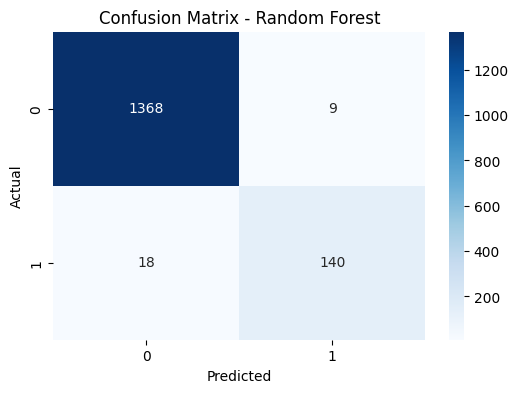

In [ ]:
# Step 7: Graphs for Model Evaluation
# Confusion Matrix for Random Forest (as an example)
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, predictions['Random Forest'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

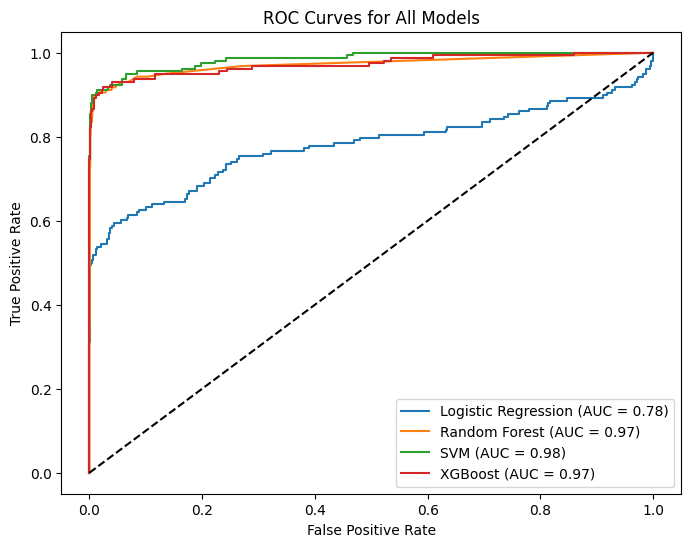

In [ ]:
# ROC Curves for all models
plt.figure(figsize=(8, 6))
for name in models.keys():
    if name + '_proba' in predictions:
        fpr, tpr, _ = roc_curve(y_test, predictions[name + '_proba'])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {metrics_df[metrics_df["Model"] == name]["ROC-AUC"].values[0]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

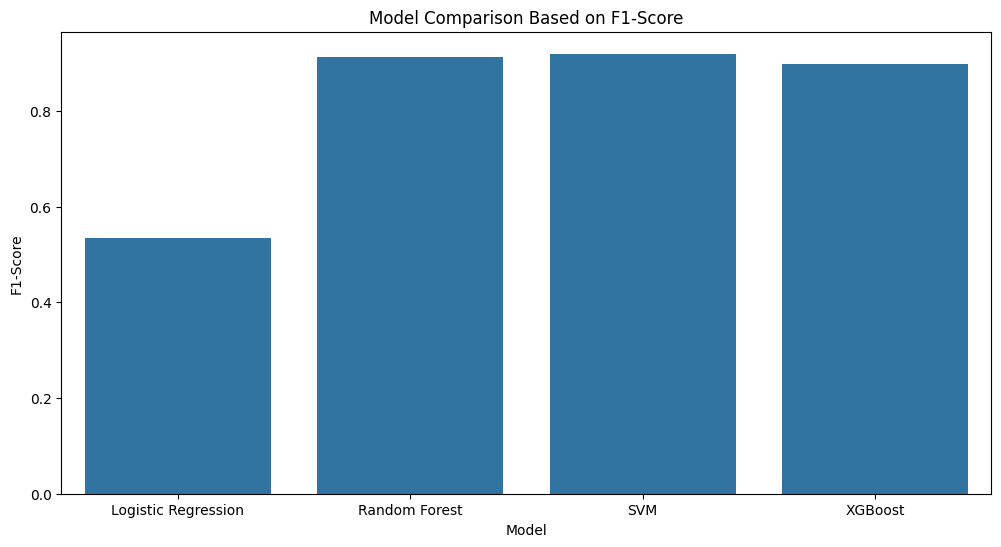

In [ ]:
# Step 8: Model Comparison Graph
plt.figure(figsize=(12, 6))  # Wider figure to accommodate four models
sns.barplot(x='Model', y='F1-Score', data=metrics_df)
plt.title('Model Comparison Based on F1-Score')
plt.ylabel('F1-Score')
plt.show()

In [ ]:
# Step 9: Suggestion for Best Model
best_model = metrics_df.loc[metrics_df['F1-Score'].idxmax()]
print(f"\nBest Model Suggestion:\n{best_model['Model']} with F1-Score: {best_model['F1-Score']:.4f}")
print("Reason: F1-Score balances precision and recall, critical for predictive maintenance to minimize false negatives (missed faults) and false positives (unnecessary maintenance).")


Best Model Suggestion:
SVM with F1-Score: 0.9195
Reason: F1-Score balances precision and recall, critical for predictive maintenance to minimize false negatives (missed faults) and false positives (unnecessary maintenance).


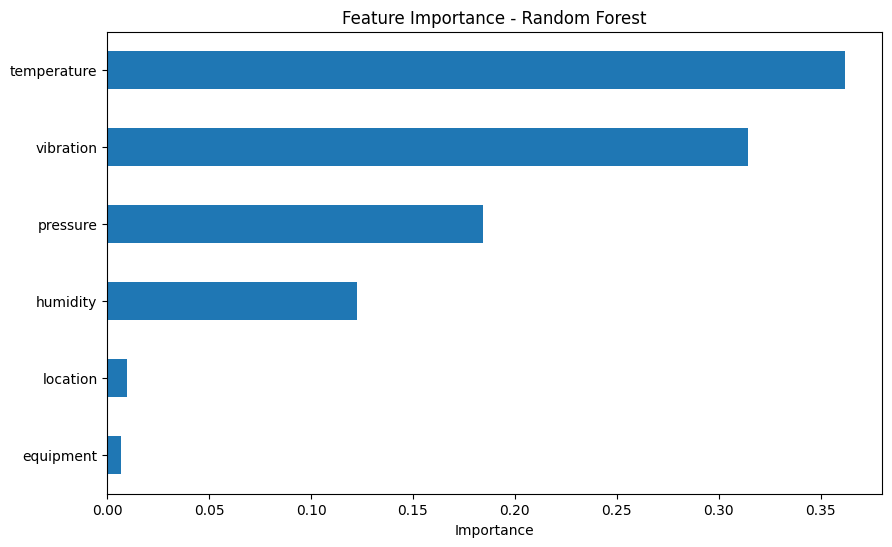

In [ ]:
# Optional: Feature Importance for Random Forest and XGBoost
# Random Forest Feature Importance
rf_model = models['Random Forest']
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importance_rf.sort_values().plot(kind='barh')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.show()

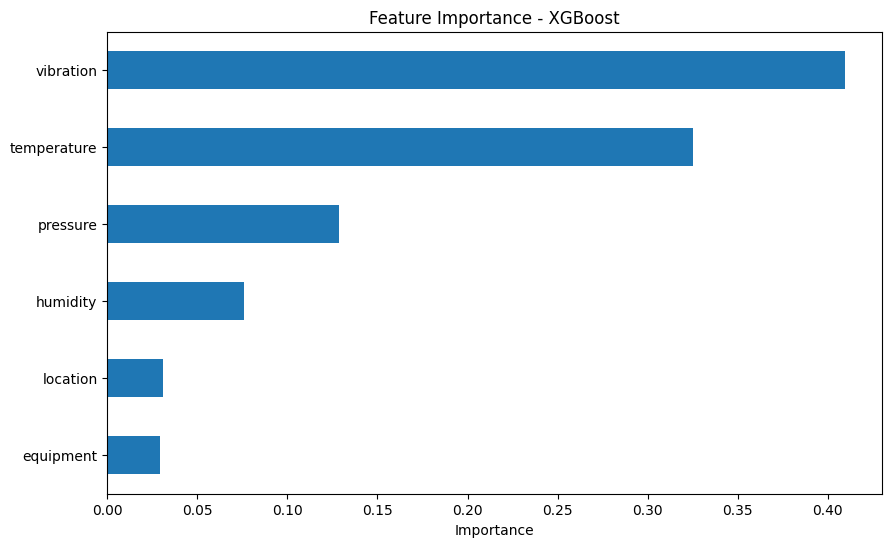

In [ ]:
# XGBoost Feature Importance
xgb_model = models['XGBoost']
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importance_xgb.sort_values().plot(kind='barh')
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.show()